# ⭐ Star Type Classification
---

Given *data about stars*, let's try to **classify a given star** into its correct type among 6 classes.

# Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('../input/star-dataset/6 class csv.csv')
data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [3]:
data.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

[](http://)

# Preprocessing

In [4]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Fix Star color overlapping
    color_mapping = {
        'Blue ': 'Blue',
        'Blue white': 'Blue White',
        'Blue-white': 'Blue White',
        'Blue white ': 'Blue White',
        'Blue-White': 'Blue White',
        'white': 'White',
        'yellow-white': 'Yellowish White',
        'White-Yellow': 'Yellowish White',
        'yellowish': 'Yellowish'
    }
    df['Star color'] = df['Star color'].replace(color_mapping)
    
    # One-hot encoding
    df = pd.concat([df, pd.get_dummies(df['Star color'], prefix='Color')], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Spectral Class'], prefix='Class')], axis=1)
    df = df.drop(['Star color', 'Spectral Class'], axis=1)
    
    # Split X and y
    X = df.drop('Star type', axis=1)
    y = df['Star type']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=0)

    # Scale X
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)
X_train

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Color_Blue,Color_Blue White,Color_Orange,Color_Orange-Red,Color_Pale yellow orange,Color_Red,...,Color_Whitish,Color_Yellowish,Color_Yellowish White,Class_A,Class_B,Class_F,Class_G,Class_K,Class_M,Class_O
61,-0.710590,-0.607428,-0.458255,1.153147,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279
210,1.368814,-0.532507,-0.446344,-0.799426,-0.549841,2.391652,-0.109764,0.0,-0.077382,-0.964901,...,-0.077382,-0.109764,-0.223607,-0.324443,2.189316,-0.27735,0.0,-0.134840,-0.976467,-0.4279
52,-0.666403,1.029405,1.824986,-1.323333,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279
66,-0.764119,-0.607428,-0.458442,1.285781,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279
26,-0.145838,-0.607428,-0.458603,0.893562,-0.549841,2.391652,-0.109764,0.0,-0.077382,-0.964901,...,-0.077382,-0.109764,-0.223607,3.082207,-0.456764,-0.27735,0.0,-0.134840,-0.976467,-0.4279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-0.778189,-0.607428,-0.458445,1.106725,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279
192,-0.758733,-0.607428,-0.458081,0.822507,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279
117,-0.689376,-0.162113,1.232368,-1.422809,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279
47,-0.694982,0.596125,-0.286820,-0.948166,-0.549841,-0.418121,-0.109764,0.0,-0.077382,1.036375,...,-0.077382,-0.109764,-0.223607,-0.324443,-0.456764,-0.27735,0.0,-0.134840,1.024100,-0.4279


# Training

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Test Set Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

Test Set Accuracy: 97.22%


# K-Fold Evaluation

In [7]:
kf = KFold(n_splits=5)

print("Split Indices:\n=======================\n")
for i, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\nSplit {i+1}:\n------------\n")
    print(f"Train: {train_idx}\n")
    print(f"Val: {val_idx}\n")

Split Indices:


Split 1:
------------

Train: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167]

Val: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]


Split 2:
------------

Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  

# Cross Validation

In [8]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross Validation Scores")
for i, score in enumerate(scores):
    print("Model {}: {:.2f}%".format(i+1, score * 100))
print("Mean: {:.2f}%".format(scores.mean() * 100))

Cross Validation Scores
Model 1: 94.12%
Model 2: 97.06%
Model 3: 94.12%
Model 4: 96.97%
Model 5: 100.00%
Mean: 96.45%


# Confusion Matrix

In [9]:
y_pred = model.predict(X_test)

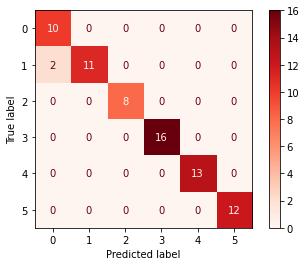

In [10]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot(cmap='Reds')
plt.show()